# Feature Importance Guide
By: Patricia Ornelas Jauregui

## What is feature importance?
When fitting models to a dataset, feature importance techniques can be used to rank the relative significance of the predictors on the target variable. 

Feature Importance refers to techniques that assign a score to each predictor in a given model. The score quantifies the significance of each feature, and hence features with higher scores are more important to predicting the target variable.

## Why do we care about feature importance?
- Can be used for feature selection. Thoughtful predictor selection is essential for model fairness
- Aides in model interpretability
- Facilitates inference-making about the dataset
- Can be used for dimensionality reduction

## How can we measure feature importance?
One popular model-agnostic technique is <b>permutation importance</b>.
Here's how it works:
1. Fit a model on a training dataset.
2. Shuffle the rows in one column
3. Make predictions using this altered dataset.
4. Compute the loss. The change in loss from this dataset compared to the original model's loss indicates the importance of the predictor that got shuffled. The bigger the degradation in performance, the more important the feature is.
5. Undo the shuffling from step 2. 
6. Repeat steps 2-5 for all columns in the dataset to get the feature importance of all the features. 

There are Python libraries that can do this for you as I will show in the code.

## Example
In this guide, I will show feature importance through an example about a criminal defendant’s likelihood of reoffending (recidivism).

Number_of_Priors: 0.157 +/- 0.007
Age_Below_TwentyFive: 0.036 +/- 0.003
Age_Above_FourtyFive: 0.024 +/- 0.003
Female: 0.023 +/- 0.003
African_American: 0.022 +/- 0.003
Misdemeanor: 0.018 +/- 0.002
Hispanic: 0.005 +/- 0.001
Other: 0.005 +/- 0.001
Asian: 0.001 +/- 0.000
Native_American: 0.001 +/- 0.000


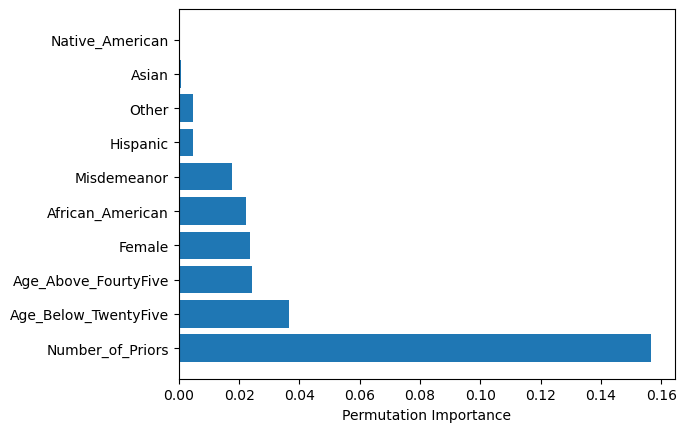

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

df = pd.read_csv("propublica_data_for_fairml.csv")
TARGET_COL = "Two_yr_Recidivism"
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL, 'score_factor'])

# Fit a random forest classifier to the data
rf = RandomForestClassifier()
rf.fit(X, y)

# Use permutation importance to get the feature importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs=-1)

# Print the important features
sorted_idx = result.importances_mean.argsort()[::-1]
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {result.importances_mean[idx]:.3f} +/- {result.importances_std[idx]:.3f}")

# Visualize the feature importance
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

For prediction of recidivism, we see that the most important feature is the number of priors that the defendant has. Age is the next most important feature. Gender and whether or not someone is African American are also considered more important than misdemeanors.

Number_of_Priors: 0.451 +/- 0.007
Age_Below_TwentyFive: 0.169 +/- 0.004
Age_Above_FourtyFive: 0.094 +/- 0.007
African_American: 0.066 +/- 0.004
Misdemeanor: 0.045 +/- 0.003
Female: 0.036 +/- 0.004
Hispanic: 0.023 +/- 0.002
Other: 0.019 +/- 0.002
Asian: 0.002 +/- 0.000
Native_American: 0.001 +/- 0.000


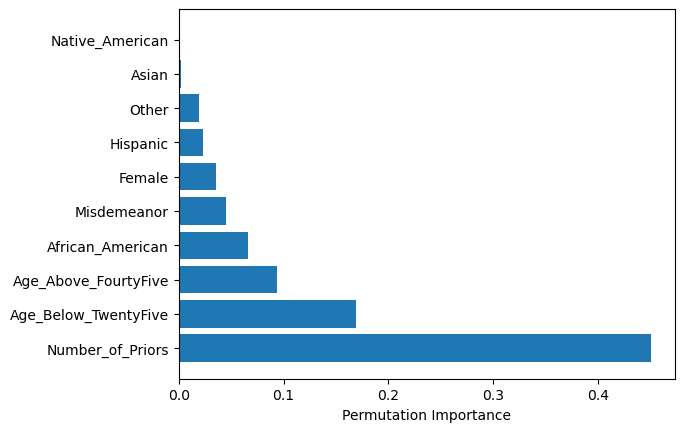

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

df = pd.read_csv("propublica_data_for_fairml.csv")
TARGET_COL = "score_factor"
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL, 'Two_yr_Recidivism'])

# Fit a random forest classifier to the data
rf = RandomForestRegressor()
rf.fit(X, y)

# Use permutation importance to get the feature importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs=-1)

# Print the important features
sorted_idx = result.importances_mean.argsort()[::-1]
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {result.importances_mean[idx]:.3f} +/- {result.importances_std[idx]:.3f}")

# Visualize the feature importance
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

For prediction of the score from COMPAS (the algorithm often used to predict recidivism by assigning each defendant a score), we see that the most important feature is the number of priors. Age is the next most important feature. However, here the African_American predictor is considered more important than in the previous model.

This is an example of how feature importance can be used for model explainability. In order to prevent bias, feature importance can help us determine if our models are fair or if they are perpetuating discrimination/unfairness.

From a study by ProPublica, with this dataset they found that:
- "Black defendants were also twice as likely as white defendants to be misclassified as being a higher risk of violent recidivism. And white violent recidivists were 63 percent more likely to have been misclassified as a low risk of violent recidivism, compared with black violent recidivists."
- "The violent recidivism analysis also showed that even when controlling for prior crimes, future recidivism, age, and gender, black defendants were 77 percent more likely to be assigned higher risk scores than white defendants."